# Compute Global Statistics

These are the utility functions we created in a previous lesson:

In [1]:
import os
import pandas as pd

def symbol_to_path(symbol, base_dir="data"):
    """Return CSV file path given ticker symbol."""
    return os.path.join(base_dir, "{}.csv".format(str(symbol)))

def get_data(symbols, dates):
    """Read stock data (adjusted close) for given symbols from CSV files."""
    df = pd.DataFrame(index=dates)
    
    if 'SPY' not in symbols:  # add SPY for reference, if absent
        symbols.insert(0, 'SPY')

    for symbol in symbols:
        
        # Read in the data
        df_temp = pd.read_csv(
            symbol_to_path(symbol), 
            index_col="Date", 
            parse_dates=True, 
            usecols=['Date', 'Adj Close'],
            na_values=['nan'],
        )
    
        # Rename to prevent clash
        df_temp = df_temp.rename(columns={'Adj Close': symbol})
        
        # Join the dataframes
        df = df.join(df_temp)
        
        # Drop any rows where SPY is NaN
        df = df.dropna(subset=['SPY'])

    return df

In [2]:
dates = pd.date_range('2010-01-01', '2012-12-31')
symbols = ['GOOG', 'IBM', 'GLD']
df = get_data(symbols, dates)
print df.head()

               SPY    GOOG     IBM     GLD
2010-01-04  108.27  626.75  126.24  109.80
2010-01-05  108.56  623.99  124.71  109.70
2010-01-06  108.64  608.26  123.90  111.51
2010-01-07  109.10  594.10  123.47  110.82
2010-01-08  109.46  602.02  124.71  111.37


Use the `mean()`, `median()`, and `std()` methods to get the statistics for each stock symbol:

In [3]:
print 'Mean:'
print df.mean()

print '\nMedian:'
print df.median()

print '\nStandard Deviation:'
print df.std()

Mean:
SPY     121.711206
GOOG    568.941941
IBM     159.669735
GLD     142.603279
dtype: float64

Median:
SPY     123.305
GOOG    578.845
IBM     161.425
GLD     146.440
dtype: float64

Standard Deviation:
SPY     11.626556
GOOG    54.068129
IBM     28.731772
GLD     20.562938
dtype: float64


# Computing Rolling Statistics

Get the data for `SPY`:

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
dates = pd.date_range('2010-01-01', '2012-12-31')
symbols = ['SPY']
df = get_data(symbols, dates)

Create a plot:

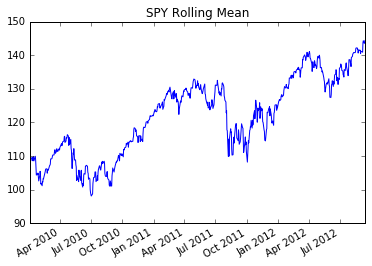

In [6]:
ax = df['SPY'].plot(title='SPY Rolling Mean', label='SPY')

Compute the rolling mean for a 20-day window:

In [7]:
rm_spy = pd.rolling_mean(df['SPY'], window=20)

Add the rolling mean to the existing plot:

In [8]:
rm_spy.plot(label='Rolling Mean', ax=ax)

Add axis labels and legend:

In [9]:
ax.set_xlabel('Date')
ax.set_ylabel('Price')
ax.legend(loc='upper left')
plt.show()

# Create Bollinger Bands

In [18]:
def get_rolling_mean(values, window):
    """Return rolling mean of given values, using specified window size."""
    return pd.rolling_mean(values, window=window)

def get_rolling_std(values, window):
    """Return rolling standard deviation of given values, using specified window size."""
    return pd.rolling_std(values, window=window)

def get_bollinger_bands(rm, rstd):
    """Return upper and lower Bollinger Bands."""
    upper_band = rm + rstd * 2
    lower_band = rm - rstd * 2
    return upper_band, lower_band

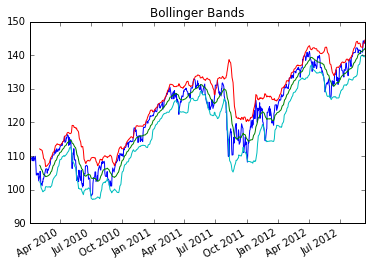

In [19]:
def test_run():
    
    # Read in data
    dates = pd.date_range('2010-01-01', '2012-12-31')
    symbols = ['SPY']
    df = get_data(symbols, dates)
    
    # Compute Bollinger Bands
    rm_spy = get_rolling_mean(df['SPY'], window=20)
    rstd_spy = get_rolling_std(df['SPY'], window=20)
    upper_band, lower_band = get_bollinger_bands(rm_spy, rstd_spy)
    
    # Plot the values
    ax = df['SPY'].plot(title='Bollinger Bands', label='SPY')
    rm_spy.plot(label='Rolling Mean', ax=ax)
    upper_band.plot(label='Upper Band', ax=ax)
    lower_band.plot(label='Lower Band', ax=ax)

test_run()

# Daily Returns

`daily_ret[t] = (price[t]/price[t-1]) -1`

In [25]:
def compute_daily_returns(df):
    daily_returns = (df / df.shift(1)) - 1
    daily_returns.iloc[0, :] = 0 # Replace NaN with 0
    return daily_returns

def plot_data(df, title="Stock prices", xlabel="Date", ylabel="Price"):
    """Plot stock prices with a custom title and meaningful axis labels."""
    ax = df.plot(title=title, fontsize=12)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    plt.show()

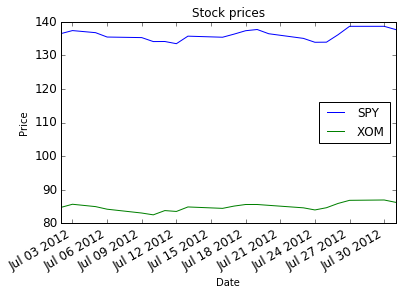

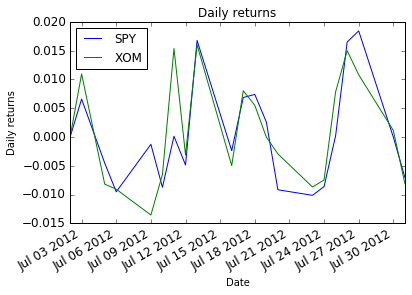

In [27]:
def test_run():
    # Read data
    dates = pd.date_range('2012-07-01', '2012-07-31')  # one month only
    symbols = ['SPY','XOM']
    df = get_data(symbols, dates)
    plot_data(df)

    # Compute daily returns
    daily_returns = compute_daily_returns(df)
    plot_data(daily_returns, title="Daily returns", ylabel="Daily returns")

test_run()

# Cumulative Returns

`cum_ret[t] = (price[t] / price[0]) - 1`

In [29]:
dates = pd.date_range('2012-07-01', '2012-07-31')  # one month only
symbols = ['SPY','XOM']
df = get_data(symbols, dates)

In [38]:
print (df['XOM'][-1] / df['XOM'][0]) - 1

0.0176907654205
